In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df=pd.read_csv("Model2.csv")
df.drop(["Unnamed: 0"],axis=1,inplace=True)
X=df.drop(["cnt"],axis=1)
y=df["cnt"]

In [2]:
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,shuffle=False ,random_state=1)

In [3]:
from sklearn.tree import DecisionTreeRegressor

In [4]:
dtr = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

In [18]:
dtr.fit(X,y)
dtr.score(X_train,y_train)

0.9079116128661248

In [6]:
dtr.score(X_test,y_test)

0.8921671357239317

# Hyperparameter tuning


In [7]:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }



In [8]:
grid_cv_dtr = GridSearchCV(dtr, param_grid, cv=10)

grid_cv_dtr.fit(X,y)

GridSearchCV(cv=10,
             estimator=DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10,
                                             min_samples_split=5),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]})

In [9]:
grid_cv_dtr.best_score_

0.6957653072058795

In [10]:
grid_cv_dtr.best_params_

{'criterion': 'mae',
 'max_depth': 8,
 'max_leaf_nodes': 100,
 'min_samples_leaf': 20,
 'min_samples_split': 10}

In [11]:
grid_cv_dtr.best_estimator_

DecisionTreeRegressor(criterion='mae', max_depth=8, max_leaf_nodes=100,
                      min_samples_leaf=20, min_samples_split=10)

In [12]:
df1 = pd.DataFrame(data=grid_cv_dtr.cv_results_)
df1.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006137,0.001617,0.005668,0.003197,mse,2,5,20,10,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",...,0.257943,0.38702,0.260349,0.285346,-0.224484,-0.373134,0.655226,-0.007731,0.556862,61
1,0.007979,0.001980,0.006261,0.002544,mse,2,5,20,20,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",...,0.257943,0.38702,0.260349,0.285346,-0.224484,-0.373134,0.655226,-0.007731,0.556862,61
2,0.006534,0.002822,0.004618,0.003398,mse,2,5,20,40,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",...,0.257943,0.38702,0.260349,0.285346,-0.224484,-0.373134,0.655226,-0.007731,0.556862,61
3,0.007329,0.002380,0.002291,0.002043,mse,2,5,40,10,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",...,0.257943,0.38702,0.260349,0.285346,-0.224484,-0.373134,0.655226,-0.007731,0.556862,61
4,0.006870,0.004260,0.005381,0.003175,mse,2,5,40,20,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",...,0.257943,0.38702,0.260349,0.285346,-0.224484,-0.373134,0.655226,-0.007731,0.556862,61


[Text(0.5, 1.0, 'Effect of Depth and Leaf Nodes on Model Performance')]

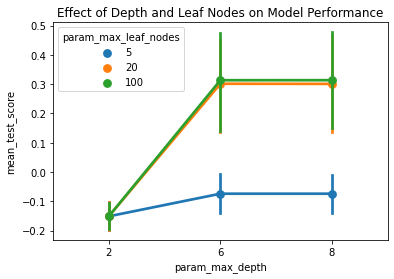

In [13]:
fig,ax = plt.subplots()
sns.pointplot(data=df1[['mean_test_score',
                           'param_max_leaf_nodes',
                           'param_max_depth']],
             y='mean_test_score',x='param_max_depth',
             hue='param_max_leaf_nodes',ax=ax)
ax.set(title="Effect of Depth and Leaf Nodes on Model Performance")

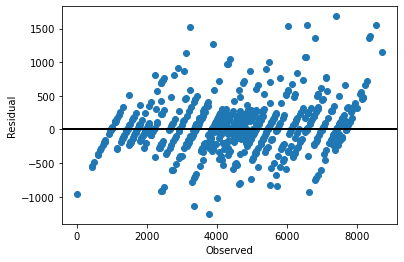

In [14]:
# Evaluating training model
predicted = grid_cv_dtr.best_estimator_.predict(X)
residuals = y-predicted

fig, ax = plt.subplots()
ax.scatter(y, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

In [15]:
predicted = grid_cv_dtr.best_estimator_.predict(X)
predicted

array([ 985. ,  985. , 1448. , 1729. , 1729. , 1729. , 1448. ,  985. ,
        985. , 1448. , 1448. , 1448. , 1448. , 1448. ,  985. ,  985. ,
        985. ,  985. , 1729. , 2200.5, 1729. ,  985. ,  985. , 1448. ,
       1977. ,  985. ,  985. , 1448. ,  985. ,  985. , 1729. , 1448. ,
       1729. , 1729. , 1729. ,  985. , 1448. , 1729. , 1729. , 1729. ,
       1729. , 1729. , 1448. , 1448. , 1977. , 1729. , 2200.5, 2646. ,
       2646. , 1448. , 1448. ,  985. , 1448. , 1977. , 1977. , 1448. ,
       1729. , 1977. , 1448. , 1977. , 2200.5, 1729. , 1977. , 1729. ,
        985. , 1729. , 2200.5, 1977. ,  985. , 1977. , 1729. , 1729. ,
       1977. , 1977. , 2200.5, 2646. , 2646. , 1977. , 1729. , 1977. ,
       2646. , 2200.5, 1977. , 2200.5, 1729. , 1448. , 1977. , 2200.5,
       1448. , 1729. , 2200.5, 1448. , 1729. , 2646. , 1729. , 2646. ,
       2934. , 1448. , 1729. , 1977. , 2934. , 1977. , 2200.5, 2934. ,
       3341. ,  985. , 3341. , 2934. , 2934. , 3855. , 4189. , 1729. ,
      

In [16]:
# Checking the training model scores
r2_scores = cross_val_score(grid_cv_dtr.best_estimator_, X, y, cv=10)
mse_scores = cross_val_score(grid_cv_dtr.best_estimator_, X, y, cv=10,scoring='neg_mean_squared_error')

print("avg R-squared::{:.3f}".format(np.mean(r2_scores)))
print("MSE::{:.3f}".format(np.mean(mse_scores)))

avg R-squared::0.696
MSE::-247253.285


In [17]:
#Test dataset evaluation
from sklearn import metrics
y_pred = grid_cv_dtr.best_estimator_.predict(X_test)
residuals = y_test - y_pred


r2_score = grid_cv_dtr.best_estimator_.score(X_test,y_test)
print("R-squared:{:.3f}".format(r2_score))
print("MSE: %.2f" % metrics.mean_squared_error(y_test, y_pred))

R-squared:0.929
MSE: 192693.20
